# Pandas Date and Time

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import pandas as pd

## Working with Timestamp

For points in time, Pandas provides the `Timestamp` type. 

It is a replacement for Python's native `datetime`, but is based on the more efficient `numpy.datetime64` data type. 

You can create a simple date time as a `Timestamp` using the Pandas `to_datetime` functions which takes a string to parse:

In [2]:
date = pd.to_datetime("14th of October, 2018")
date

Timestamp('2018-10-14 00:00:00')

You can also use the Timestamp constructor directly

In [4]:
date = pd.Timestamp(year=2018, month=10, day=14, hour=12, minute=0, second=30)
python_datetime = date.to_pydatetime()
print(date)
print(type(date))
print(python_datetime)
print(type(python_datetime))

2018-10-14 12:00:30
<class 'pandas._libs.tslib.Timestamp'>
2018-10-14 12:00:30
<class 'datetime.datetime'>


There are multiple attributes that let you access the information stored in a Timestamp object. 

You can find the full list here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Timestamp.html#pandas.Timestamp

In [5]:
print(date.day)
print(date.dayofyear)
print(date.week)
print(date.month)
print(date.year)
print(date.hour)
print(date.minute)
print(date.second)

14
287
41
10
2018
12
0
30


## Working with Time Series

In [8]:
datetimes = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])
datetimes

DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'], dtype='datetime64[ns]', freq=None)

In [9]:
series = pd.Series([10, 4, 14, 30], index=datetimes)
series

2014-07-04    10
2014-08-04     4
2015-07-04    14
2015-08-04    30
dtype: int64

In [10]:
series['2015']

2015-07-04    14
2015-08-04    30
dtype: int64

In [12]:
type(series)

pandas.core.series.Series

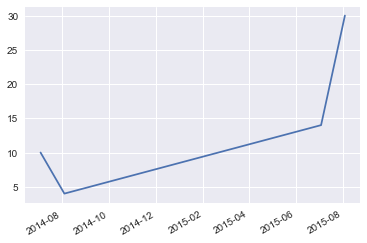

In [13]:
series.plot()

### Create a range of dates
You can simple create a range of dates by providing two dates interval. By default, the interval is one day.

In [17]:
dates = pd.date_range('2015-07-03', '2015-07-10')
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

You can also be more specific by deciding how many periods and what unit to use for the frequency. E.g. here `W` means week.

In [18]:
weeks = pd.date_range('2018 Oct 1', periods = 10, freq = 'W')
weeks

DatetimeIndex(['2018-10-07', '2018-10-14', '2018-10-21', '2018-10-28',
               '2018-11-04', '2018-11-11', '2018-11-18', '2018-11-25',
               '2018-12-02', '2018-12-09'],
              dtype='datetime64[ns]', freq='W-SUN')

### Timedelta

Pandas allow you to do arithmetic which returns deltas:

In [19]:
weeks - weeks[0]

TimedeltaIndex([ '0 days',  '7 days', '14 days', '21 days', '28 days',
                '35 days', '42 days', '49 days', '56 days', '63 days'],
               dtype='timedelta64[ns]', freq=None)

## Exercises

Let's retrieve stock data from Google using the Yahoo API.
This will be represented as a time series by date.

In [35]:
from pandas_datareader import data

goog = data.DataReader('AMZN', start='2017', end='2019', data_source='iex')
goog.head()

2y


,open,high,low,close,volume
date,,,,,
2017-01-03,757.92,758.7595,747.7000,753.67,3521066
2017-01-04,758.39,759.6800,754.2000,757.18,2510526
2017-01-05,761.55,782.3999,760.2557,780.45,5830068
2017-01-06,782.36,799.4400,778.4800,795.99,5986234
2017-01-09,798.00,801.7742,791.7700,796.92,3446109


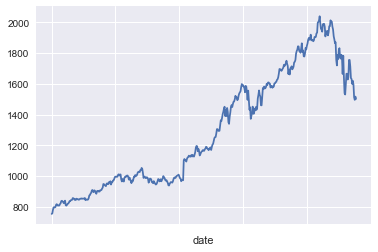

In [24]:
goog['close'].plot()

### Find the date for the highest closing price in 2018

In [36]:
goog['close']['2018'].argmax()


KeyError: '2018'

### Find the median closing price in 2018

In [ ]:
goog['close']['2018'].median()


### Find the average closing prince in July 2018

In [ ]:
goog['close']['2018-01'].mean()


## Timezones

In [ ]:
london = pd.Timestamp.now(tz="Europe/London")
brussels = london.tz_convert("Europe/Brussels")
print(london)
print(brussels)